<img src="https://raw.githubusercontent.com/sebastianVP/sebastianVP/main/toulouselautrec_logo.jpg" alt= "LOGO CAT" width=400 height=400 align = "right">

<br>
<h1><font color="#7F000E" size=5>TOULOUSE LAUTREC </font></h1>
<h1><font color="#7F000R" size=6> ANALISIS DE DATOS CON PYTHON </font></h1>
<h1><font color="#7F000E" size=4> MATRIZ DE CONFUSION
 </font></h1>
<br>
<br>
<div style="text-align:right">
<font color="#7F000E" size=3> Ing. Alexander Valdez</font><br>
<font color="#7F000E" size=3>  Curso 2271, Clases LUNES y MIERCOLES 20:00-22:30pm </font><br>
<font color="#7F000e" size=3> EJEMPLO </font><br>
</div>

# **MATRIZ DE CONFUSION**

Here are the basic input parameters for the function make_classification():

* n_samples: How many observations do you want to generate?
* n_features: The number of numerical features.
* n_informative: The number of features that are ‘useful.’ Only these features carry the signal that your model will use to classify the dataset.
* n_classes: The number of unique classes (values) for the target label.
The function will return a tuple containing two NumPy arrays - the features (X) and the corresponding labels (y).

In [ ]:
import numpy as np
import itertools
import sklearn
import matplotlib

import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from xgboost import XGBClassifier

In [ ]:
sklearn.__version__, matplotlib.__version__, np.__version__

('1.2.2', '3.7.1', '1.25.2')

In [ ]:
# using random data for this exaple
X, y = make_classification(
    n_samples=10000,
    n_features=25,
    n_informative=10,
    n_redundant=0,
    n_classes=5)

class_names = ['class-1','class-2','class-3','class-4','class-5']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

clf = XGBClassifier()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

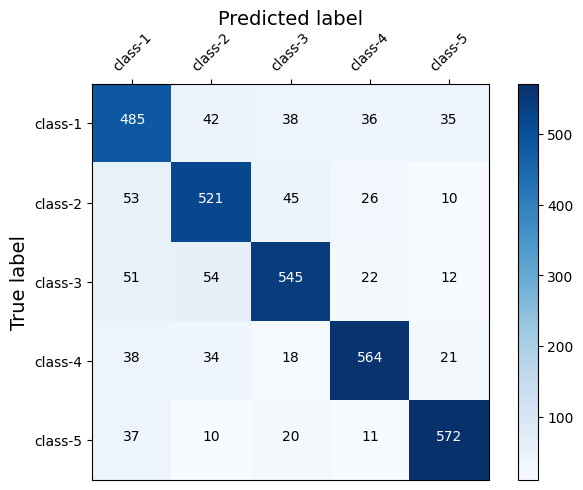

In [ ]:
matrix = confusion_matrix(y_test,y_pred)

plt.clf()

# place labels at the top
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')

# plot the matrix per se
plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)

# plot colorbar to the right
plt.colorbar()

fmt = 'd'

# write the number of predictions in each bucket
thresh = matrix.max() / 2.
for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):

    # if background is dark, use a white number, and vice-versa
    plt.text(j, i, format(matrix[i, j], fmt),
         horizontalalignment="center",
         color="white" if matrix[i, j] > thresh else "black")

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.tight_layout()
plt.ylabel('True label',size=14)
plt.xlabel('Predicted label',size=14)
plt.show()

# **Nota:**

Revisar link de documentación.

# EJEMPLO CON DATA SIMULADA

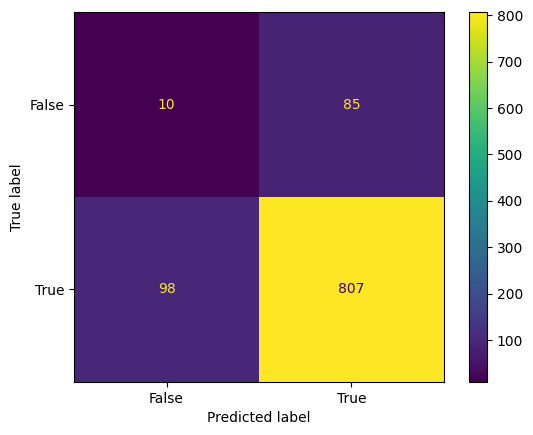

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

# Generar datos de ejemplo de etiquetas reales y predichas
actual = numpy.random.binomial(1,.9,size = 1000) # original
predicted = numpy.random.binomial(1,.9,size = 1000)# validado o predecido

# Crear la matriz de confusión utilizando sklearn
confusion_matrix = metrics.confusion_matrix(actual, predicted)

# Crear la visualización de la matriz de confusión
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

# Graficar la matriz de confusión
cm_display.plot()
plt.show()

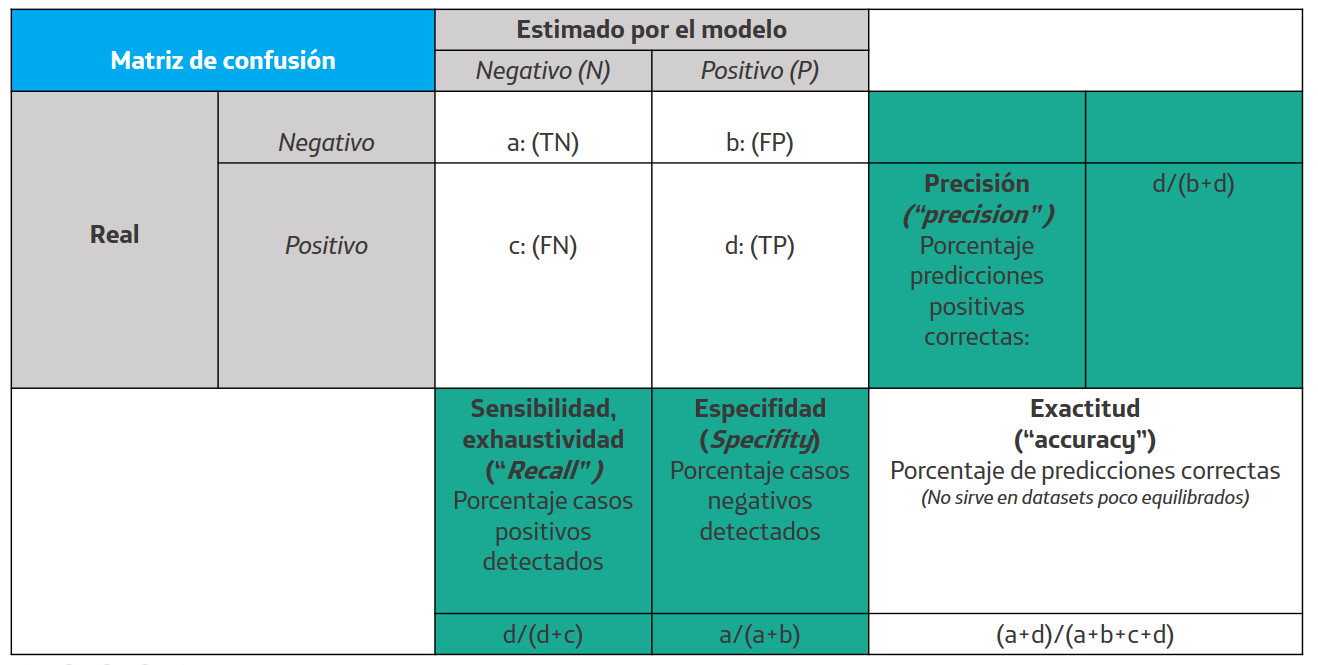

In [ ]:
predicted.shape

(1000,)

#**Métricas creadas para evaluar la matriz de confusión**

La matriz nos proporciona muchas métricas útiles que nos ayudan a evaluar nuestro modelo de clasificación:
* Exactitud
* Precisión
* Sensibilidad
* Especificidad
* F-Score

Las diferentes medidas incluyen: Exactitud, Precisión, Sensibilidad (Recordatorio), Especificidad y la puntuación F, que se explican a continuación.

## **Exactitud**

(Verdadero positivo + Verdadero negativo) / Predicciones totales

In [ ]:
Accuracy = metrics.accuracy_score(actual, predicted)


In [ ]:
Accuracy

0.811

## **Precision**

De los positivos pronosticados, ¿qué porcentaje es realmente positivo?



Verdadero Positivo / (Verdadero Positivo + Falso Positivo)



In [ ]:
Precision = metrics.precision_score(actual, predicted)


# Sensibilidad

*De todos los casos positivos, ¿qué porcentaje se pronostican positivos?
* La sensibilidad (a veces denominada recuperación) mide qué tan bueno es el modelo para predecir aspectos positivos.

Esto significa que analiza los verdaderos positivos y los falsos negativos (que son positivos que se han predicho incorrectamente como negativos).

Verdadero Positivo / (Verdadero Positivo + Falso Negativo)



In [ ]:
Sensitivity_recall = metrics.recall_score(actual, predicted)


# Especificidad

* ¿Como de bien el modelo predice resultados negativos?
*
La especificidad es similar a la sensibilidad, pero la mira desde la perspectiva de los resultados negativos.

In [ ]:
Specificity = metrics.recall_score(actual, predicted, pos_label=0)


# **F-Score**

F-score es la «media armónica» de precisión y sensibilidad.

Considera casos falsos positivos y falsos negativos y es bueno para conjuntos de datos desequilibrados.

2 * ((Precisión * Sensibilidad) / (Precisión + Sensibilidad))



Esta puntuación no tiene en cuenta los valores True Negative:



In [ ]:
F1_score = metrics.f1_score(actual, predicted)


# Evaluar todos los cálculos a la vez


In [ ]:
#metrics
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})

{'Accuracy': 0.811, 'Precision': 0.8835920177383592, 'Sensitivity_recall': 0.9046538024971623, 'Specificity': 0.11764705882352941, 'F1_score': 0.8939988782950083}
